# <b>This AI model will be trained and tested against MNIST data set and will be able to classify handwritten digits.</b>

In [1]:
import tensorflow as tf # framework for building the model

### <i>Loading MNIST dataset - handwritten digits (0-9) with 28x28 size</i>
### <i>Tensorflow has it already and can be loaded using Keras.</i>

In [2]:
mnist = tf.keras.datasets.mnist

# Unpacking and dividing the dataset into training and testing datasets
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [3]:
# MNIST data contains 60000 training samples and 10000 testing samples
print("-----------------------------------------------------------------------")
print("The length of training set (x) is", len(xTrain))
print("The length of training set (y) is", len(yTrain))
print("-----------------------------------------------------------------------")
print("The length of testing set (x) is", len(xTest))
print("The length of testing set (y) is", len(yTest))
print("-----------------------------------------------------------------------")

# Shape of the image is 28x28
print("The shape of the 5th element in the training set is", xTrain[4].shape)
print("The 5th element from the training set consists of:-\n", xTrain[4])
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
The length of training set (x) is 60000
The length of training set (y) is 60000
-----------------------------------------------------------------------
The length of testing set (x) is 10000
The length of testing set (y) is 10000
-----------------------------------------------------------------------
The shape of the 5th element in the training set is (28, 28)
The 5th element from the training set consists of:-
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   

### <i>Importing Matplotlib to Plot and View the Images</i>

In [4]:
import matplotlib.pyplot as plt

### <u>Visualising an Image as Sample</u>

5


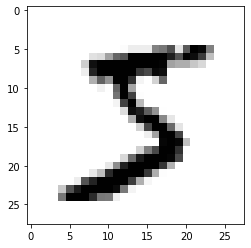

In [5]:
plt.imshow(xTrain[0])
print(yTrain[0])

# we don't know if it's coloured image or binary image
# so, we shall change the configuration to simple binary
plt.imshow(xTrain[0], cmap=plt.cm.binary)

### <u>Scaling/Normalisation</u>
#### <i>division by 255 to bring in the range 0 to 1</i>

In [6]:
xTrain = xTrain / 255
xTest = xTest / 255

print("-----------------------------------------------------------------------")
print("The reshaped and normalised (1st training image) image is:", xTrain[0],
      sep="\n")
print("-----------------------------------------------------------------------")
print("The reshaped and normalised (1st testing image) image is:", xTest[0],
      sep="\n")
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
The reshaped and normalised (1st training image) image is:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.    

### <i>Resizing Images to Make Them Suitable for Applying Convolution Operations</i>

In [7]:
import numpy as np # required for array and other mathematical operations

In [8]:
IMG_SIZE = 28
# Increasing by one dimension (making it 4-dimensional) so that it can work with
# Keras API
xTrainr = np.array(xTrain).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
xTestr = np.array(xTest).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("-----------------------------------------------------------------------")
print("Training samples shape:", xTrainr.shape)
print("Testing samples shape:", xTestr.shape)
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Training samples shape: (60000, 28, 28, 1)
Testing samples shape: (10000, 28, 28, 1)
-----------------------------------------------------------------------


### <b>Creating Deep Neural Netwrok</b>

In [9]:
# Importing the required functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, MaxPooling2D
from tensorflow.keras.layers import Flatten, Conv2D

In [10]:
# Creating a simple neural network
dc_model = Sequential() # Sequential allows to build a model layer by layer

# First Convolutional Layer (from 28^2 to 26^2)
# (input layer size is mentioned for only first layer)
dc_model.add(Conv2D(64, (3, 3), input_shape = xTrainr.shape[1: ]))
# activation function to make it non-linear
dc_model.add(Activation("relu"))
# maxpooling single maximum value of 2x2
dc_model.add(MaxPooling2D(pool_size=(2, 2))) # selects the maximum element from
                                          # each region of the feature map
                                          # reducing the size by half

# Second Convolutional Layer (from 26^2 to 24^2)
dc_model.add(Conv2D(64, (3, 3)))
dc_model.add(Activation("relu"))
dc_model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer (from 24^2 to 22^2)
dc_model.add(Conv2D(64, (3, 3)))
dc_model.add(Activation("relu"))
dc_model.add(MaxPooling2D(pool_size=(2, 2)))

# Now we shall flatten (transfroming into a single column) the feature map
# matrix before connecting the layers fully
dc_model.add(Flatten())

# Creating the dense layer (fully connecting the each layer to the next layer)
dc_model.add(Dense(64)) # connecting first layer
dc_model.add(Activation("relu"))

dc_model.add(Dense(32)) # connecting layer 2
dc_model.add(Activation("relu"))

# Last fully connected layer, where the output must be equal to number of
# classes, 10, that is (0 to 9)
dc_model.add(Dense(10))
dc_model.add(Activation("softmax")) # class probabilities

In [11]:
# Displaying the dc_model summary
print("-----------------------------------------------------------------------")
print("Here is the model's summary:-")
display(dc_model.summary())
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Here is the model's summary:-
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (Ma

None

-----------------------------------------------------------------------


### <u>Compiling AI Model</u>

In [12]:
dc_model.compile(
    optimizer="adam", # controls the learning rate
    loss="sparse_categorical_crossentropy", # estimates the loss of the model
    metrics=['accuracy']
)

### <u>Training the Model</u>

In [13]:
dc_model.fit(xTrainr, yTrain, epochs=15, validation_split=0.3)

Epoch 1/15
1313/1313 [==============================] - 30s 22ms/step - loss: 0.2588 - accuracy: 0.9188 - val_loss: 0.0905 - val_accuracy: 0.9726
Epoch 2/15
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0830 - accuracy: 0.9742 - val_loss: 0.0655 - val_accuracy: 0.9796
Epoch 3/15
1313/1313 [==============================] - 27s 21ms/step - loss: 0.0600 - accuracy: 0.9814 - val_loss: 0.0547 - val_accuracy: 0.9829
Epoch 4/15
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.0702 - val_accuracy: 0.9782
Epoch 5/15
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0640 - val_accuracy: 0.9808
Epoch 6/15
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0326 - accuracy: 0.9891 - val_loss: 0.0627 - val_accuracy: 0.9829
Epoch 7/15
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.0537 -

### <u>Evaluation of Model</u>

In [14]:
dc_loss, dc_accuracy = dc_model.evaluate(xTest, yTest)
print("-----------------------------------------------------------------------")
print("Accuracy Percentage of this AI Model: ", dc_accuracy * 100, "%", sep="")
print("-----------------------------------------------------------------------")

313/313 [==============================] - 2s 5ms/step - loss: 0.0746 - accuracy: 0.9855
-----------------------------------------------------------------------
Accuracy Percentage of this AI Model: 98.54999780654907%
-----------------------------------------------------------------------


### <u>Model Predictions</u>

In [15]:
# Creating a list of predictions of all the test images
yPredictions = dc_model.predict(xTestr)

print("-----------------------------------------------------------------------")
print("The predictions arrays are:-\n", yPredictions)
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
The predictions arrays are:-
 [[1.7934844e-14 3.5857672e-10 7.2886044e-09 ... 1.0000000e+00
  9.5155151e-12 3.9262131e-12]
 [6.3702649e-10 9.8942419e-09 9.9999964e-01 ... 3.2691568e-07
  1.4266022e-10 4.6664771e-16]
 [1.2403251e-07 9.9999917e-01 9.7318207e-08 ... 1.9634591e-07
  1.3003181e-07 9.4023846e-09]
 ...
 [2.8583317e-14 3.9140653e-11 2.5982544e-11 ... 1.5879047e-12
  4.2537533e-11 2.1939086e-11]
 [4.3930907e-08 3.2629750e-08 1.0219497e-12 ... 9.1068136e-13
  3.5064947e-08 4.3437467e-07]
 [2.8514578e-06 3.9152830e-12 8.7185464e-10 ... 5.6155024e-12
  1.7657390e-09 7.5658951e-10]]
-----------------------------------------------------------------------


In [22]:
# Checking if the predictions are true
yPredictedDigit = [np.argmax(probability) for probability in yPredictions]

def ifPredictionCorrect(index):
    plt.matshow(xTestr[index]) # the original test sample
    print("Actual digit:", yTest[index])
    print("Predicted digit:", yPredictedDigit[index])

    if yPredictedDigit[index] == yTest[index]:
        print("Correct Prediction!")
    else:
        print("Incorrect Prediction!")

    print("")
# end function ifPredictionCorrect()

-----------------------------------------------------------------------
Actual digit: 9
Predicted digit: 9
Correct Prediction!

Actual digit: 5
Predicted digit: 5
Correct Prediction!

Actual digit: 7
Predicted digit: 7
Correct Prediction!

Actual digit: 6
Predicted digit: 6
Correct Prediction!

Actual digit: 1
Predicted digit: 1
Correct Prediction!

-----------------------------------------------------------------------


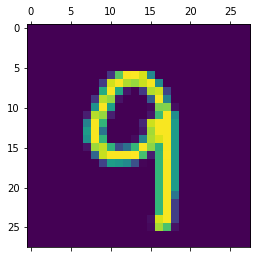

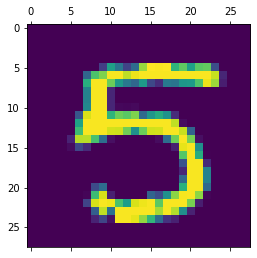

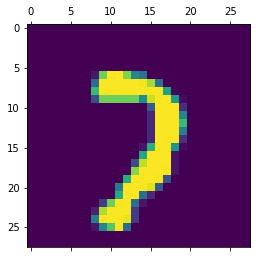

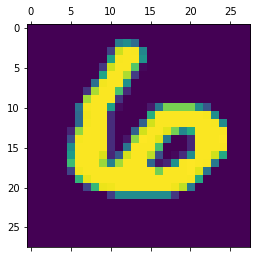

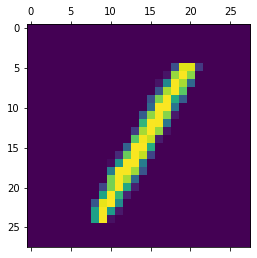

In [23]:
# Function Calls
print("-----------------------------------------------------------------------")
ifPredictionCorrect(496)
ifPredictionCorrect(3569)
ifPredictionCorrect(6589)
ifPredictionCorrect(8464)
ifPredictionCorrect(9969)
print("-----------------------------------------------------------------------")

### <u>Confusion Matrix</u>

In [18]:
confMatx = tf.math.confusion_matrix(labels=yTest, predictions=yPredictedDigit)

print("-----------------------------------------------------------------------")
print("Simple Confusion Matrix:", confMatx, sep="\n")
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Simple Confusion Matrix:
tf.Tensor(
[[ 970    1    1    1    0    1    3    2    0    1]
 [   0 1122    1    7    0    0    2    3    0    0]
 [   1    0 1016    6    0    0    0    9    0    0]
 [   0    0    1 1007    0    1    0    0    1    0]
 [   3    2    3    0  967    0    2    0    0    5]
 [   2    1    0    6    0  879    1    1    2    0]
 [   4    2    1    0    3    4  942    0    2    0]
 [   0    1   10    8    0    0    0 1006    1    2]
 [   3    0    3    6    0    1    3    2  955    1]
 [   2    0    1    1    4    4    0    2    4  991]], shape=(10, 10), dtype=int32)
-----------------------------------------------------------------------


#### <i>Visualising the Confusion Matrix Using Seaborn Library</i>

The Heatmap of the Confusion Matrx is:-


Text(69.0, 0.5, 'True Value')

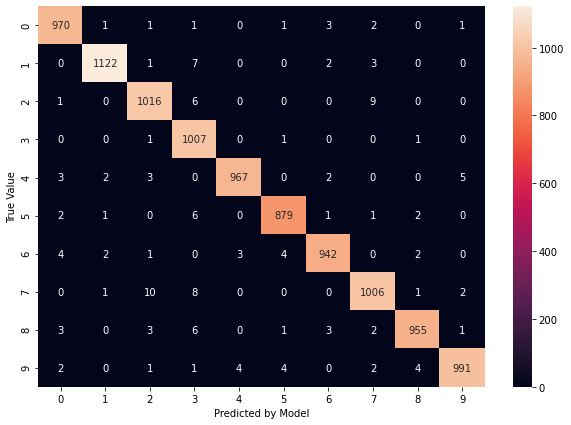

In [19]:
import seaborn as sn

print("The Heatmap of the Confusion Matrx is:-")
plt.figure(figsize = (10, 7))
sn.heatmap(confMatx, annot=True, fmt='d')
plt.xlabel("Predicted by Model")
plt.ylabel("True Value")

# <b>---------------------------------------------------------------------------------------------------</b>